## The Problem - MC

A mouse is hiding in one of N holes (let’s assume N = 7 and label them from 0 to 6) in an old abandoned mansion.

• Each night the mouse moves randomly to an adjacent hole, exactly one number away,

• A cat plans to catch the mouse and plans to sit down at a given hole (let’s say, number = k) and hunt in that hole every morning.

• Question: For how many days (on average) will it have to stay at a given hole (“k”) until it may catch the mouse?

In [4]:
#Note (1): solve the problem for N=7
#Note (2): As an optional additional exercise, you could also think about the problem in the case of a “circular” 
#arrangement of the holes (i.e.: the mouse could also move from hole 0 to N-1 back and forth)

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from markovchains import MarkovChain

def cat_and_mouse(runs=25000):
    days = []
    
    # loops simulation 250000 times 
    for r in range(runs):
        cat = 3
        mouse = random.randint(1,7) # mouse picks random hole
        day_count = 0
        
        # game simulation
        while cat != mouse: # while cat is not in mouse's hole
            # move mouse to the adjacent hole
            if mouse == 1: 
                mouse = 2
            elif mouse == 7: 
                mouse = 6
            else:
                mouse = mouse - random.choice([-1,1]) 
            day_count += 1
        days.append(day_count)   
    return days

days = cat_and_mouse()
print('DONE',np.array(days).mean())

DONE 8.1442


The average number of days the cat would have to stay at a hole until it catches a mouse is 8, according to the brute force simulation. 

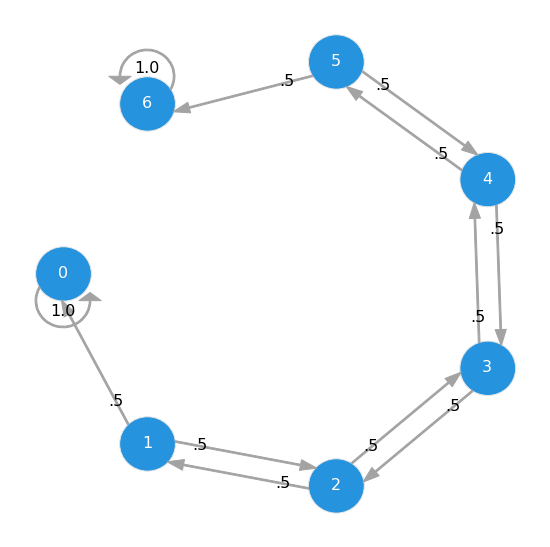

In [3]:
P = np.array([[1, 0, 0, 0, 0, 0, 0],
              [0.5, 0, 0.5, 0, 0, 0, 0],
              [0, 0.5, 0, 0.5, 0, 0, 0],
              [0, 0, 0.5, 0, 0.5, 0, 0],
              [0, 0, 0, 0.5, 0, 0.5, 0],
              [0, 0, 0, 0, 0.5, 0, 0.5],
              [0, 0, 0, 0, 0, 0, 1]]) # Transition matrix
mc = MarkovChain(P, ['0', '1', '2', '3', '4', '5', '6'])
mc.draw()

Since the Markov Chain is not circular, we begin with the state of one. From there, it is a 50% chance that any of the adjacent doors will be chosen, so they are assigned the probability of 0.5, with none of the states (except for the first and the last) able to repeat. The first and the last state may loop back on themselves as the mouse cannot move between the doors in a circular fashion. 

In [8]:
n = 7

# The matrix of probabilities of success/failure (conditioned to State):
success_probabilities = np.zeros(n)

# Assume the mouse is caught with a probability of 0.1 when the cat is in the same hole
for i in range(n):
    success_probabilities[i] = 0.1

print(success_probabilities)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [9]:
# The basic MDP diagram for a generic State:
from collections import namedtuple

State = namedtuple("State", ["mouse_position", "cat_position"])

# Example of a state where the mouse is in hole 3 and the cat is in hole 5
example_state = State(3, 5)

In [ ]:
# Define and model:
# the transition probability matrix for the position of the mouse
# the matrix of probabilities (success/failure) conditioned to the state
# the basic MDP diagram for a generic state
# the whole MDP diagram of the problem